In [1]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
x,y = boston.data , boston.target
print(x.shape)
print(y.shape)

(506, 13)
(506,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [5]:
x = x.reshape(x.shape[0], x.shape[1] ,1)
print(x.shape)

(506, 13, 1)


In [6]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest ,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


step 1 : Define the model

In [8]:
model = Sequential()
model.add(Conv1D(32,2,activation='relu',input_shape=(13,1)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1))

step2: compile the model

In [9]:
model.compile(loss='mse',optimizer='adam')

step3: Fit the model

In [10]:
model.fit(Xtrain,ytrain,batch_size=10,epochs=200)

Epoch 1/200
41/41 [==============================] - 1s 2ms/step - loss: 99.3562
Epoch 2/200
41/41 [==============================] - 0s 2ms/step - loss: 85.9542
Epoch 3/200
41/41 [==============================] - 0s 2ms/step - loss: 71.1845
Epoch 4/200
41/41 [==============================] - 0s 2ms/step - loss: 63.6665
Epoch 5/200
41/41 [==============================] - 0s 2ms/step - loss: 79.6255
Epoch 6/200
41/41 [==============================] - 0s 2ms/step - loss: 78.2477
Epoch 7/200
41/41 [==============================] - 0s 2ms/step - loss: 66.4072
Epoch 8/200
41/41 [==============================] - 0s 2ms/step - loss: 68.6454
Epoch 9/200
41/41 [==============================] - 0s 2ms/step - loss: 61.0046
Epoch 10/200
41/41 [==============================] - 0s 2ms/step - loss: 50.8390
Epoch 11/200
41/41 [==============================] - 0s 2ms/step - loss: 51.9210
Epoch 12/200
41/41 [==============================] - 0s 2ms/step - loss: 50.2567
Epoch 13/200
41/41 [=====

step 4: Evalute the model

In [11]:
print(model.evaluate(Xtest,ytest))

4/4 [==============================] - 0s 3ms/step - loss: 15.8964
15.896384239196777


step 5 : predict the model

In [13]:
ypred = model.predict(Xtest)

In [15]:
from sklearn.metrics import mean_squared_error
print('MSE:%.4f '%mean_squared_error(ytest,ypred))

MSE:15.8964 


plot the results

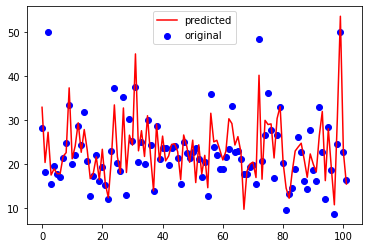

In [16]:
import matplotlib.pyplot as plt
X_axis = range(len(ypred))
plt.scatter(X_axis,ytest,color='blue',label='original')
plt.plot(X_axis,ypred,color='red',label='predicted')
plt.legend()
plt.show()